Traditional processing

In [1]:
import os
from math import sqrt
from statistics import mean, median, stdev

First we'll load the data

In [2]:

data_files_list = ["./export/"+f for f in os.listdir("./export") ]
instance_dict = {}
instance_additionals = {}
set_sizes_dict = {}
for dir_str in data_files_list:
    with open(dir_str, 'r') as text_file:
        cnt = 0
        instance = ""
        for line in text_file:
            if cnt < 9:
                if cnt == 0:
                    instance = line.split()[0]
                    instance_dict[instance] = []
                if cnt == 4:
                    instance_additionals[instance] = []
                    split_line = line.split()
                    instance_additionals[instance].append([int(i) for i in split_line])
                cnt += 1
                continue
            split_line = line.split()
            instance_dict[instance].append([int(i) for i in split_line])
        text_file.close()

ng_dict = {}
cnt = -1
with open("ng_outs.csv", 'r') as text_file:
    for line in text_file:
        if cnt < 2:
            cnt += 1
            continue
        raw_line = line.strip()
        split_line_list = raw_line.split(sep=";")
        instance = split_line_list[3]
        if instance not in ng_dict:
            # ng_dict[instance] = [[0 for i in range(101)]]
            ng_dict[instance] = []
        ng_dict[instance].append([int(i) for i in split_line_list[5:-1]])
        set_sizes_dict[instance] = sum(sum(i) for i in ng_dict[instance])
        if len(split_line_list[5:-1]) != 100:
            print("case found for instance "+instance)
    text_file.close()

In [3]:
ordered_difficulty = [(k,v) for k,v in set_sizes_dict.items()]
ordered_difficulty = sorted(ordered_difficulty, key=lambda tup: tup[1], reverse=True)
instances_to_add = [ordered_difficulty[i][0] for i in range(0,1000)]
# instances_remaining = [ordered_difficulty[i][0] for i in range(1000,len(ordered_difficulty))]
# easy_instances = sample(instances_remaining, 2000)
instance_list = instances_to_add #+ easy_instances

In [4]:
data_files_list = ["./export2/"+f for f in os.listdir("./export2") ]

for dir_str in data_files_list:
    with open(dir_str, 'r') as text_file:
        cnt = 0
        instance = ""
        for line in text_file:
            if cnt < 9:
                if cnt == 0:
                    instance = line.split()[0]
                    instance_dict[instance] = []
                if cnt == 4:
                    instance_additionals[instance] = []
                    split_line = line.split()
                    instance_additionals[instance].append([int(i) for i in split_line])
                cnt += 1
                continue
            split_line = line.split()
            instance_dict[instance].append([int(i) for i in split_line])
        text_file.close()

cnt = -1
with open("ng_outs_JLA.csv", 'r') as text_file:
    for line in text_file:
        if cnt < 1:
            cnt += 1
            continue
        raw_line = line.strip()
        split_line_list = raw_line.split(sep=";")
        instance = split_line_list[3]
        if instance not in ng_dict:
            # ng_dict[instance] = [[0 for i in range(101)]]
            ng_dict[instance] = []
        ng_dict[instance].append([int(i) for i in split_line_list[5:]])
        set_sizes_dict[instance] = sum(sum(i) for i in ng_dict[instance])
        # add new instances
        instance_list.append(instance)
        if len(split_line_list[5:]) != 100:
            print("case found for instance "+instance)
    text_file.close()

In [5]:

data_files_list = ["./export8/"+f for f in os.listdir("./export8") ]
for dir_str in data_files_list:
    with open(dir_str, 'r') as text_file:
        cnt = 0
        instance = ""
        for line in text_file:
            if cnt < 9:
                if cnt == 0:
                    instance = line.split()[0]
                    instance_dict[instance] = []
                if cnt == 4:
                    instance_additionals[instance] = []
                    split_line = line.split()
                    instance_additionals[instance].append([int(i) for i in split_line])
                cnt += 1
                continue
            split_line = line.split()
            instance_dict[instance].append([int(i) for i in split_line])
        text_file.close()

cnt = -1
with open("ng_outs_29-11.csv", 'r') as text_file:
    for line in text_file:
        if cnt < 2:
            cnt += 1
            continue
        raw_line = line.strip()
        split_line_list = raw_line.split(sep=";")
        instance = split_line_list[3]
        if instance not in ng_dict:
            # ng_dict[instance] = [[0 for i in range(101)]]
            ng_dict[instance] = []
        ng_dict[instance].append([int(i) for i in split_line_list[5:-1]])
        set_sizes_dict[instance] = sum(sum(i) for i in ng_dict[instance])
        if instance in instance_dict.keys():
            instance_list.append(instance)
        if len(split_line_list[5:-1]) != 100:
            print("case found for instance "+instance)
    text_file.close()

now we'll process each graph in order to get all the desired variables

In [19]:
def distance(x1, y1, x2, y2):
    x = max(x1 - x2, x2 - x1)
    y = max(y1 - y2, y2 - y1)
    return sqrt(x**2 + y**2)


In [7]:
data_dict = {}
from ipywidgets import IntProgress
from IPython.display import display

max_count = len(instance_list)
cnt = 0

f = IntProgress(min=0, max=max_count) # instantiate the bar
display(f) # display the bar
for instance_name in instance_list:
    data_dict[instance_name] = {
        "nodes" : [],
        "graph" : {
            "vehicles": -1,
            "capacity": -1,
            "extension": -1,
            "avg_ext": -1,
            "avg_route_len": -1
            },
        "edges" : []
    }
    instance = instance_dict[instance_name]
    max_demand = -1
    total_demand = 0
    vehicles, capacity = instance_additionals[instance_name][0]
    data_dict[instance_name]["graph"]["vehicles"] = vehicles
    data_dict[instance_name]["graph"]["capacity"] = capacity
    node_d, xcoor_d, ycoor_d, _, ai_d, bi_d, _ = instance[0]
    dist_list = []
    for i in instance[1:]:
        demand = i[3]
        total_demand += demand
        if demand > max_demand:
            max_demand = demand
    data_dict[instance_name]["graph"]["avg_route_len"] = total_demand/capacity
    for i in instance[1:]:
        node, xcoor, ycoor, demand, ai, bi, st = i
        x_coor_norm = xcoor - xcoor_d
        y_coor_norm = ycoor - ycoor_d
        radial_dist = sqrt(x_coor_norm**2 + y_coor_norm**2)
        dist_list.append(radial_dist)
        data_dict[instance_name]["nodes"].append({
            "id": node,
            "demand": demand,
            "ai": ai,
            "bi": bi,
            "x": xcoor,
            "y": ycoor,
            "xn": x_coor_norm,
            "yn": y_coor_norm,
            "st": st,
            "rad": radial_dist
        })
    data_dict[instance_name]["graph"]["extension"] = max(dist_list)
    data_dict[instance_name]["graph"]["avg_ext"] = mean(dist_list)
    for i in range(100):
        for j in range(100):
            if i != j:
                i_nod = data_dict[instance_name]["nodes"][i]
                j_nod = data_dict[instance_name]["nodes"][j]
                dist = distance(i_nod["x"], i_nod["y"], j_nod["x"], j_nod["y"])
                alpha = max(i_nod["ai"] + i_nod["st"] + dist, j_nod["ai"])
                return_t_measure = max(0, j_nod["bi"] -  alpha)
                return_c_measure = capacity - (i_nod["demand"] + j_nod["demand"])
                is_neighbor = ng_dict[instance_name][i][j]
                data_dict[instance_name]["edges"].append({
                    "from": i,
                    "to": j,
                    "dist": dist,
                    "time_cycle": return_t_measure,
                    "capacity_cycle": return_c_measure,
                    "y": is_neighbor
                })
    f.value += 1
        

IntProgress(value=0, max=137500)

In [2]:
import pickle


In [ ]:
with open('test_data.pickle', 'wb') as handle:
    pickle.dump(data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
with open('test_data.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)

In [4]:
from random import sample

In [5]:
X_pos = []
X_neg = []
y_pos = []
y_neg = []
graphs_list = sample(list(data_dict.keys()), 500)
for graph_id in graphs_list:
    graph = data_dict[graph_id]
    cnt = 0
    for i in range(100):
        for j in range(100):
            if i != j:
                row = [
                    graph["graph"]["vehicles"], graph["graph"]["capacity"], graph["graph"]["extension"], graph["graph"]["avg_ext"], graph["graph"]["avg_route_len"],
                    graph["nodes"][i]["demand"], graph["nodes"][i]["st"], graph["nodes"][i]["rad"],
                    graph["nodes"][j]["demand"], graph["nodes"][j]["st"], graph["nodes"][j]["rad"],
                    graph["edges"][cnt]["dist"], graph["edges"][cnt]["time_cycle"], graph["edges"][cnt]["capacity_cycle"]
                    ]
                y = graph["edges"][cnt]["y"]
                if y == 1:
                    X_pos.append(row)
                    y_pos.append(1)
                else:
                    X_neg.append(row)
                    y_neg.append(0)
                cnt += 1


In [11]:
print(len(X_pos))

178854


In [12]:
print(len(X_neg))

4771146


In [6]:
X_pos_sample = sample(list(range(len(X_pos))), 100000)
X_neg_sample = sample(list(range(len(X_neg))), 100000)
X = [X_pos[i] for i in X_pos_sample] + [X_neg[i] for i in X_neg_sample]
y = [y_pos[i] for i in X_pos_sample] + [y_neg[i] for i in X_neg_sample]

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [9]:
clf = RandomForestClassifier()

In [10]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
y_pred_test = clf.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.894

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

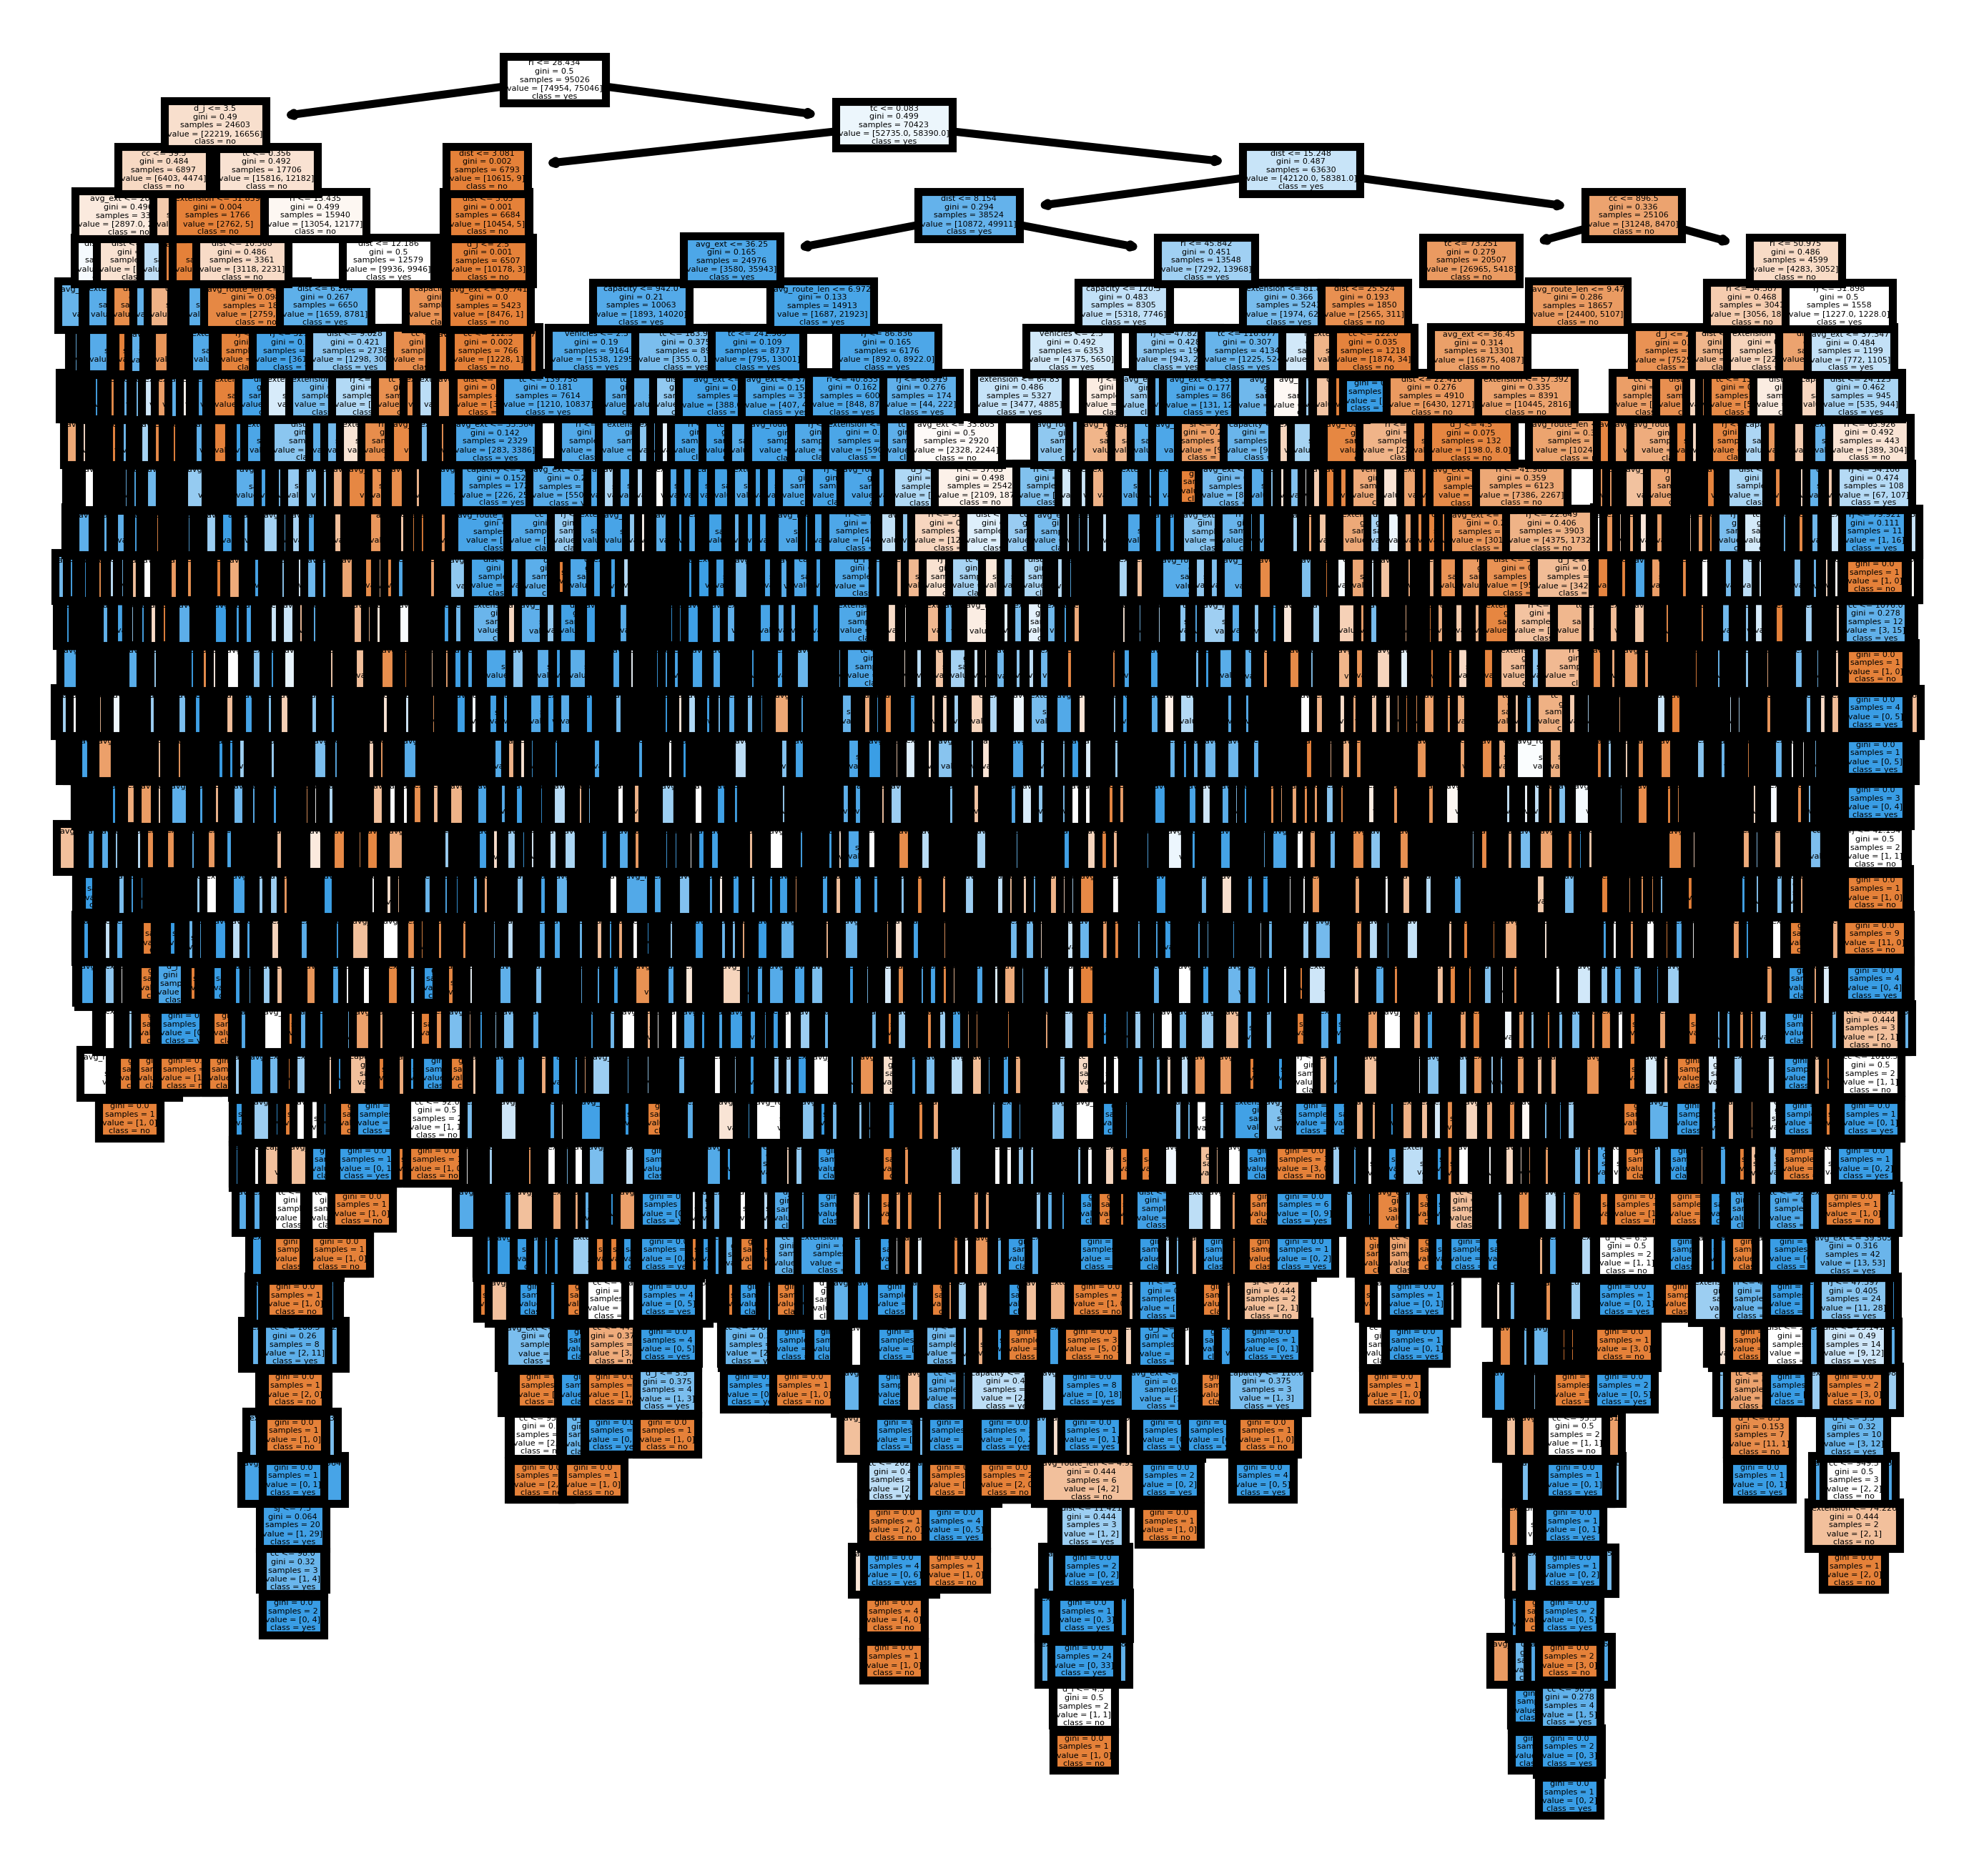

In [16]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = ["vehicles", "capacity", "extension", "avg_ext", "avg_route_len", "d_i", "si", "ri", "d_j", "sj", "rj", "dist", "tc", "cc"], 
               class_names=["no", "yes"],
               filled = True);
fig.savefig('rf_individualtree.png')

In [15]:
clf2 = RandomForestClassifier(criterion="log_loss", max_depth=100, max_features=4)
clf2.fit(X_train, y_train)
y_pred_test2 = clf2.predict(X_test)
accuracy_score(y_test, y_pred_test2)

0.89394

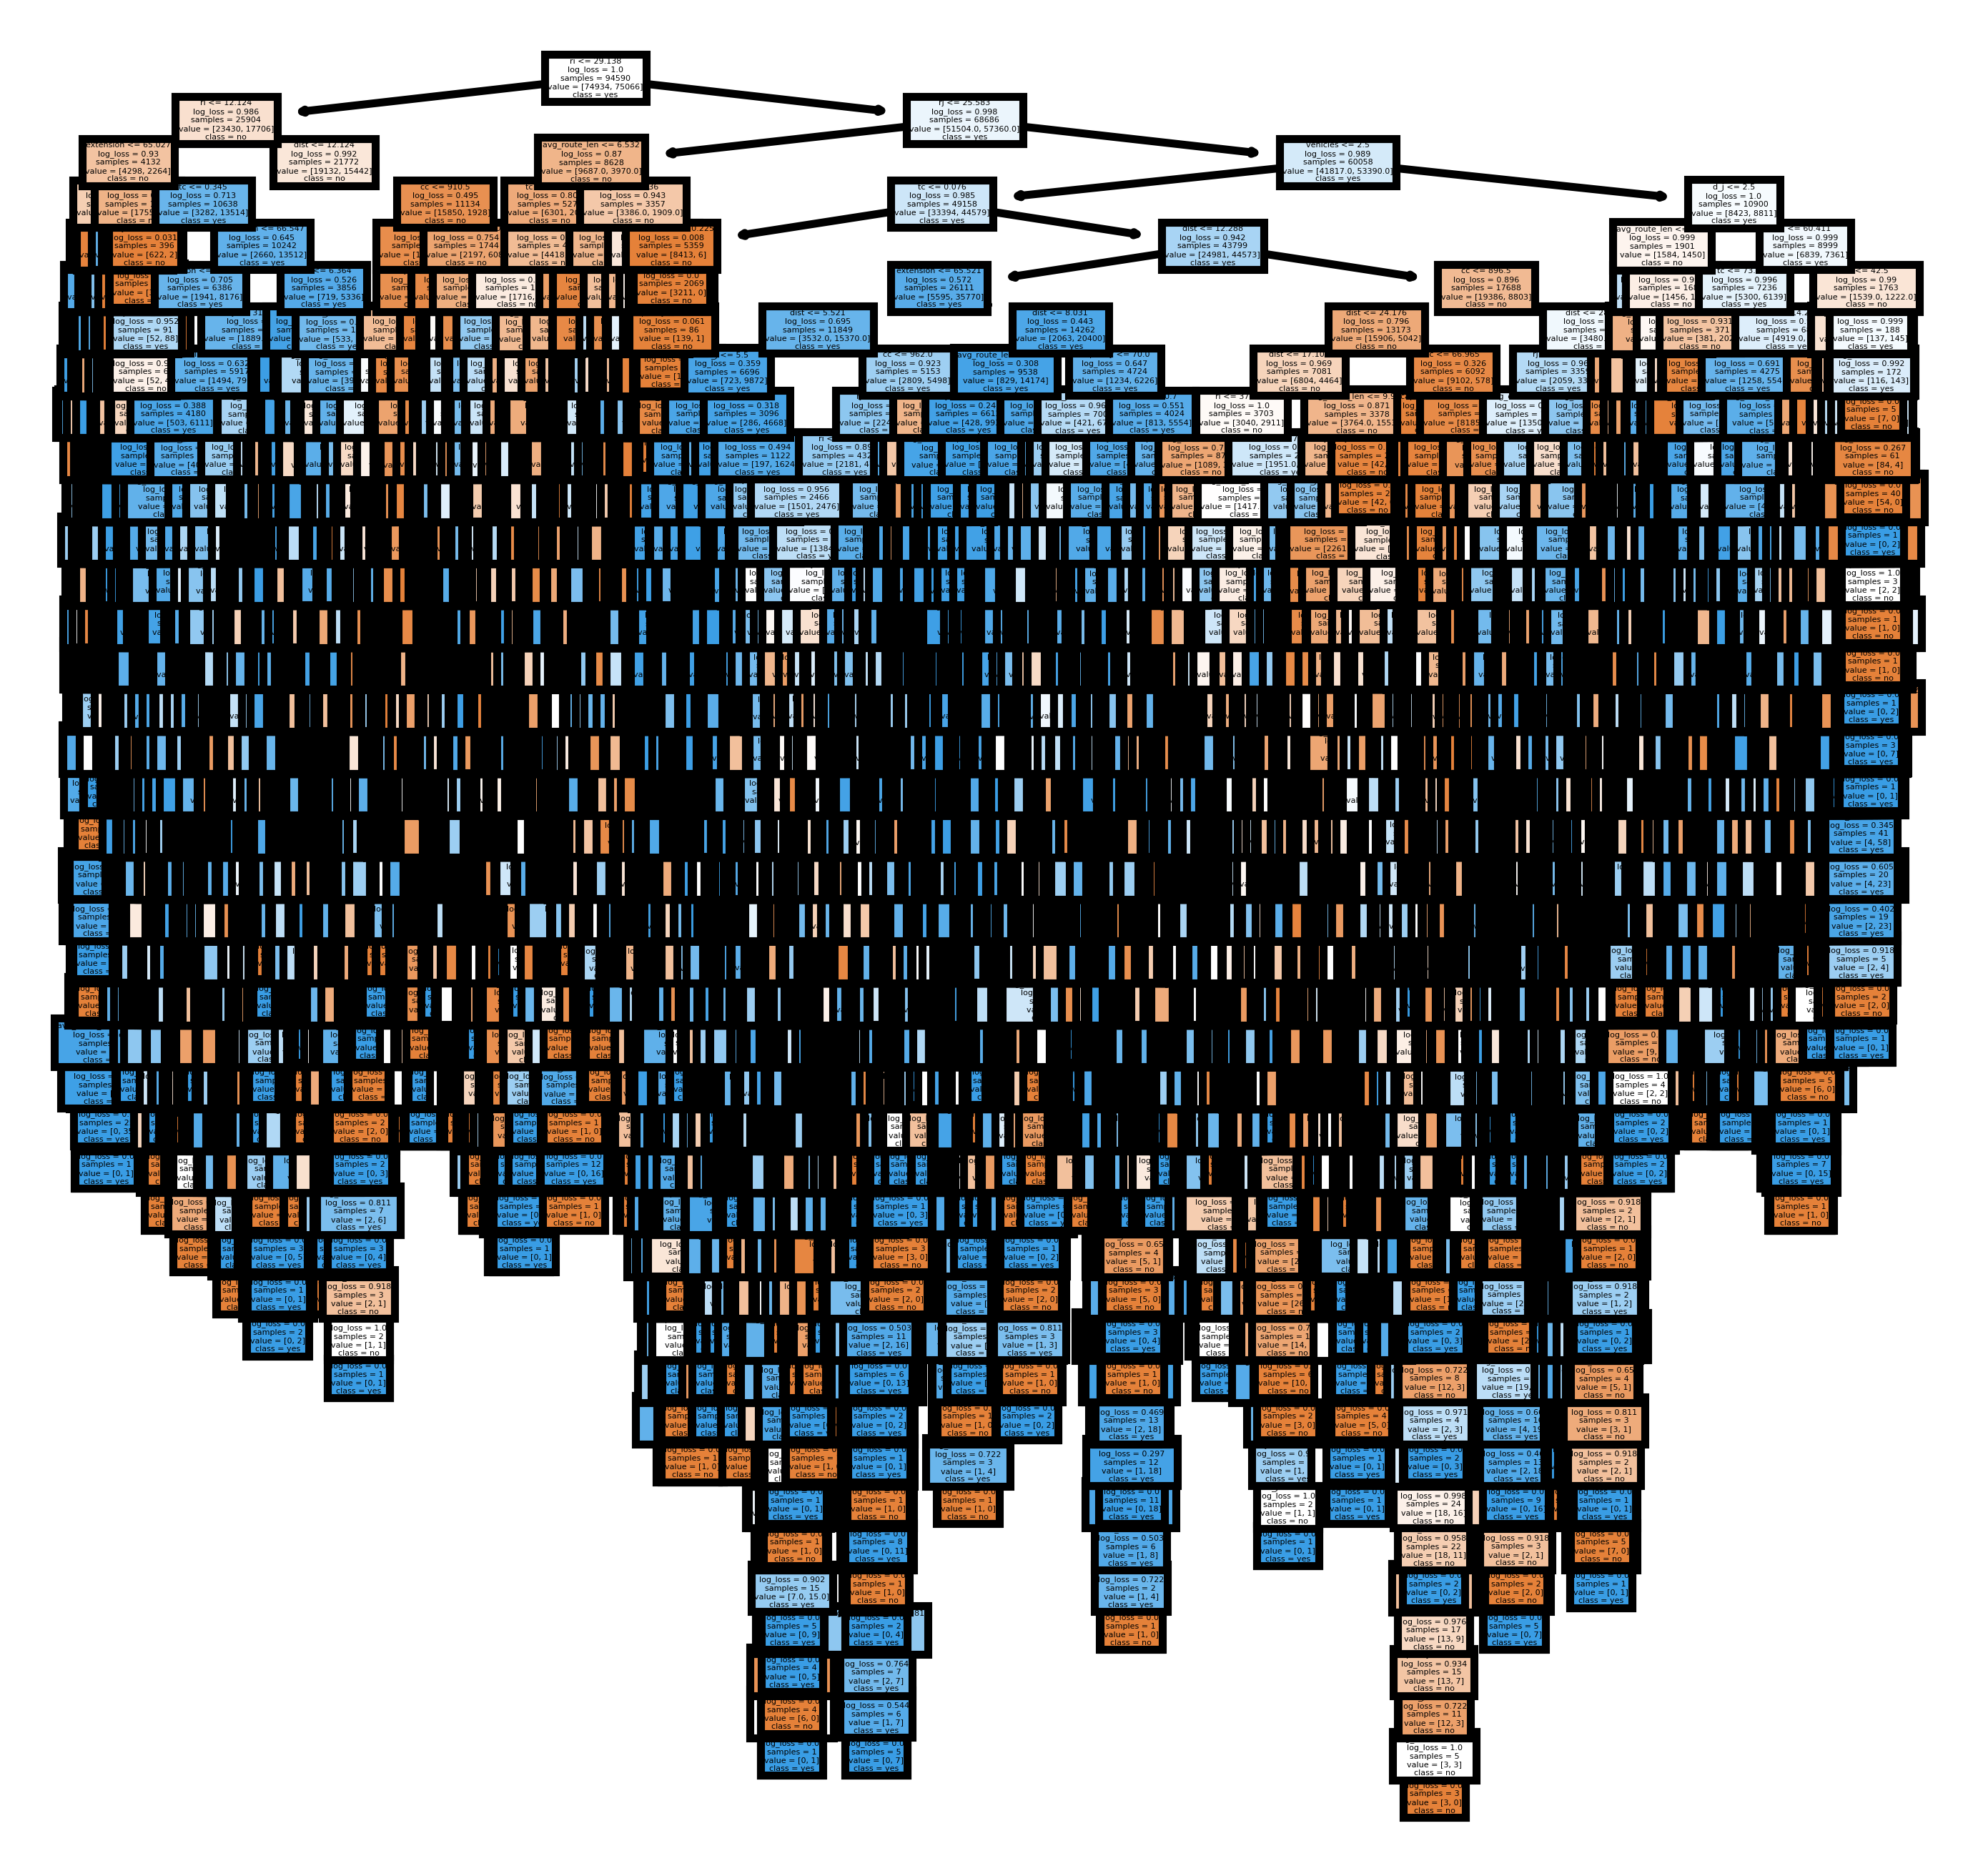

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf2.estimators_[0],
               feature_names = ["vehicles", "capacity", "extension", "avg_ext", "avg_route_len", "d_i", "si", "ri", "d_j", "sj", "rj", "dist", "tc", "cc"], 
               class_names=["no", "yes"],
               filled = True);
fig.savefig('rf_individualtree2.png')

Now I'll test on some Solomon instances:
- Get the files and process them with the AugNG generator to get accuracy measures
- Process the data here to get node to node comparissons -----> DIFFICULT! Some of the solutions to Solomon instances are in big files hard to explore
- Run models available to get predictions and get graph accuracy

In [18]:
validation_instance = {}
validation_instance_additionals = {}
with open("C204.txt", 'r') as text_file:
    cnt = 0
    instance = ""
    for line in text_file:
        if cnt < 9:
            if cnt == 0:
                instance = line.split()[0]
                validation_instance[instance] = []
            if cnt == 4:
                validation_instance_additionals[instance] = []
                split_line = line.split()
                validation_instance_additionals[instance].append([int(i) for i in split_line])
            cnt += 1
            continue
        split_line = line.split()
        validation_instance[instance].append([int(i) for i in split_line])
    text_file.close()

validation_ng_dict = {}
validation_set_sizes_dict = {}
cnt = -1
with open("ng_outs_oct.csv", 'r') as text_file:
    for line in text_file:
        if cnt < 2:
            cnt += 1
            continue
        raw_line = line.strip()
        split_line_list = raw_line.split(sep=";")
        instance = split_line_list[3]
        if instance not in validation_ng_dict:
            # ng_dict[instance] = [[0 for i in range(101)]]
            validation_ng_dict[instance] = []
        validation_ng_dict[instance].append([int(i) for i in split_line_list[5:-1]])
        validation_set_sizes_dict[instance] = sum(sum(i) for i in validation_ng_dict[instance])
        if len(split_line_list[5:-1]) != 100:
            print("case found for instance "+instance)
    text_file.close()

In [22]:
validation_dict = {}

for instance_name in validation_instance.keys():
    validation_dict[instance_name] = {
        "nodes" : [],
        "graph" : {
            "vehicles": -1,
            "capacity": -1,
            "extension": -1,
            "avg_ext": -1,
            "avg_route_len": -1
            },
        "edges" : []
    }
    instance = validation_instance[instance_name]
    max_demand = -1
    total_demand = 0
    vehicles, capacity = validation_instance_additionals[instance_name][0]
    validation_dict[instance_name]["graph"]["vehicles"] = vehicles
    validation_dict[instance_name]["graph"]["capacity"] = capacity
    node_d, xcoor_d, ycoor_d, _, ai_d, bi_d, _ = instance[0]
    dist_list = []
    for i in instance[1:]:
        demand = i[3]
        total_demand += demand
        if demand > max_demand:
            max_demand = demand
    validation_dict[instance_name]["graph"]["avg_route_len"] = total_demand/capacity
    for i in instance[1:]:
        node, xcoor, ycoor, demand, ai, bi, st = i
        x_coor_norm = xcoor - xcoor_d
        y_coor_norm = ycoor - ycoor_d
        radial_dist = sqrt(x_coor_norm**2 + y_coor_norm**2)
        dist_list.append(radial_dist)
        validation_dict[instance_name]["nodes"].append({
            "id": node,
            "demand": demand,
            "ai": ai,
            "bi": bi,
            "x": xcoor,
            "y": ycoor,
            "xn": x_coor_norm,
            "yn": y_coor_norm,
            "st": st,
            "rad": radial_dist
        })
    validation_dict[instance_name]["graph"]["extension"] = max(dist_list)
    validation_dict[instance_name]["graph"]["avg_ext"] = mean(dist_list)
    for i in range(100):
        for j in range(100):
            if i != j:
                i_nod = validation_dict[instance_name]["nodes"][i]
                j_nod = validation_dict[instance_name]["nodes"][j]
                dist = distance(i_nod["x"], i_nod["y"], j_nod["x"], j_nod["y"])
                alpha = max(i_nod["ai"] + i_nod["st"] + dist, j_nod["ai"])
                return_t_measure = max(0, j_nod["bi"] -  alpha)
                return_c_measure = capacity - (i_nod["demand"] + j_nod["demand"])
                is_neighbor = validation_ng_dict[instance_name][i][j]
                validation_dict[instance_name]["edges"].append({
                    "from": i,
                    "to": j,
                    "dist": dist,
                    "time_cycle": return_t_measure,
                    "capacity_cycle": return_c_measure,
                    "y": is_neighbor
                })

In [24]:
X_val = []
y_val = []
graph = validation_dict["C204"]
cnt = 0
for i in range(100):
    for j in range(100):
        if i != j:
            row = [
                graph["graph"]["vehicles"], graph["graph"]["capacity"], graph["graph"]["extension"], graph["graph"]["avg_ext"], graph["graph"]["avg_route_len"],
                graph["nodes"][i]["demand"], graph["nodes"][i]["st"], graph["nodes"][i]["rad"],
                graph["nodes"][j]["demand"], graph["nodes"][j]["st"], graph["nodes"][j]["rad"],
                graph["edges"][cnt]["dist"], graph["edges"][cnt]["time_cycle"], graph["edges"][cnt]["capacity_cycle"]
                ]
            y = graph["edges"][cnt]["y"]
            X_val.append(row)
            y_val.append(y)
            cnt += 1

In [25]:
y_pred_val = clf.predict(X_val)
accuracy_score(y_val, y_pred_val)

0.9433333333333334